In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datasets import load_dataset

ds = load_dataset("Mike0307/MNIST-M")

C:\Users\anshb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import numpy as np

train_data = ds['train']
test_data = ds['test']

X_train = [np.array(image.resize((28, 28))) for image in train_data['image']]  # Resizing each image to (28, 28)
y_train = train_data['label']

X_test = [np.array(image.resize((28, 28))) for image in test_data['image']]  # Resizing each image to (28, 28)
y_test = test_data['label']

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)  
y_test = np.array(y_test)    

print('The current size of our dataset is : \nX_train -> ',X_train.shape,'\ny_train -> ' , y_train.shape, 
      '\nX_test -> ' , X_test.shape,'\ny_test' , y_test.shape )



The current size of our dataset is : 
X_train ->  (59001, 28, 28, 3) 
y_train ->  (59001,) 
X_test ->  (9001, 28, 28, 3) 
y_test (9001,)


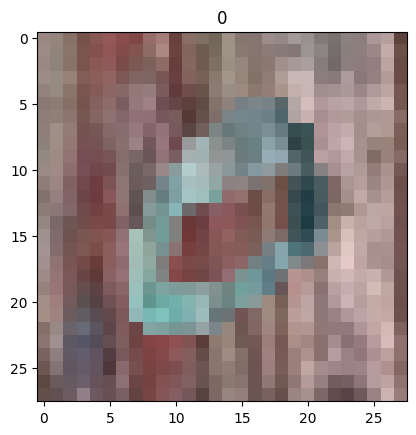

In [4]:
def plot_img(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()
for i in range(1):
    plot_img(i)

In [5]:
# Normalizing the image
'''
Converts pixel values from 0-255 (uint8) to 0.0-1.0 (float32).
This helps neural networks train faster and more accurately.
'''
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255
print(len(X_train))

# expand the dimension to (28,28,1)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

59001


In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
# we have converted our class to one hot vector 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') 
])


C:\Users\anshb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)
mc = ModelCheckpoint(r'bestmodel.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]


In [10]:

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10, 
                    batch_size=64, 
                    callbacks=cb)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
922/922 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6512 - loss: 1.0535
Epoch 1: val_accuracy improved from -inf to 0.92301, saving model to bestmodel.h5


922/922 ━━━━━━━━━━━━━━━━━━━━ 6595s 7s/step - accuracy: 0.6514 - loss: 1.0530 - val_accuracy: 0.9230 - val_loss: 0.2473
Epoch 2/10
919/922 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9302 - loss: 0.2315
Epoch 2: val_accuracy improved from 0.92301 to 0.94245, saving model to bestmodel.h5


922/922 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9302 - loss: 0.2315 - val_accuracy: 0.9425 - val_loss: 0.1919
Epoch 3/10
921/922 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9486 - loss: 0.1686
Epoch 3: val_accuracy improved from 0.94245 to 0.95001, saving model to bestmodel.h5


922/922 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.9486 - loss: 0.1686 - val_accuracy: 0.9500 - val_loss: 0.1651
Epoch 4/10
920/922 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9571 - loss: 0.1373
Epoch 4: val_accuracy improved from 0.95001 to 0.95334, saving model to bestmodel.h5


922/922 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.9571 - loss: 0.1373 - val_accuracy: 0.9533 - val_loss: 0.1608
Epoch 5/10
921/922 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9680 - loss: 0.1062
Epoch 5: val_accuracy improved from 0.95334 to 0.95567, saving model to bestmodel.h5


922/922 ━━━━━━━━━━━━━━━━━━━━ 107s 52ms/step - accuracy: 0.9680 - loss: 0.1062 - val_accuracy: 0.9557 - val_loss: 0.1485
Epoch 6/10
922/922 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9730 - loss: 0.0858
Epoch 6: val_accuracy improved from 0.95567 to 0.95700, saving model to bestmodel.h5


922/922 ━━━━━━━━━━━━━━━━━━━━ 99s 107ms/step - accuracy: 0.9730 - loss: 0.0858 - val_accuracy: 0.9570 - val_loss: 0.1445
Epoch 7/10
921/922 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9775 - loss: 0.0709
Epoch 7: val_accuracy did not improve from 0.95700
922/922 ━━━━━━━━━━━━━━━━━━━━ 86s 93ms/step - accuracy: 0.9775 - loss: 0.0709 - val_accuracy: 0.9550 - val_loss: 0.1559
Epoch 8/10
922/922 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9812 - loss: 0.0591
Epoch 8: val_accuracy did not improve from 0.95700
922/922 ━━━━━━━━━━━━━━━━━━━━ 129s 79ms/step - accuracy: 0.9812 - loss: 0.0591 - val_accuracy: 0.9501 - val_loss: 0.1836
Epoch 8: early stopping
282/282 - 1s - 3ms/step - accuracy: 0.9501 - loss: 0.1836
Test accuracy: 0.9501166343688965


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
X_test_flat shape: (10000, 2352)
y_test_int shape: (10000,)


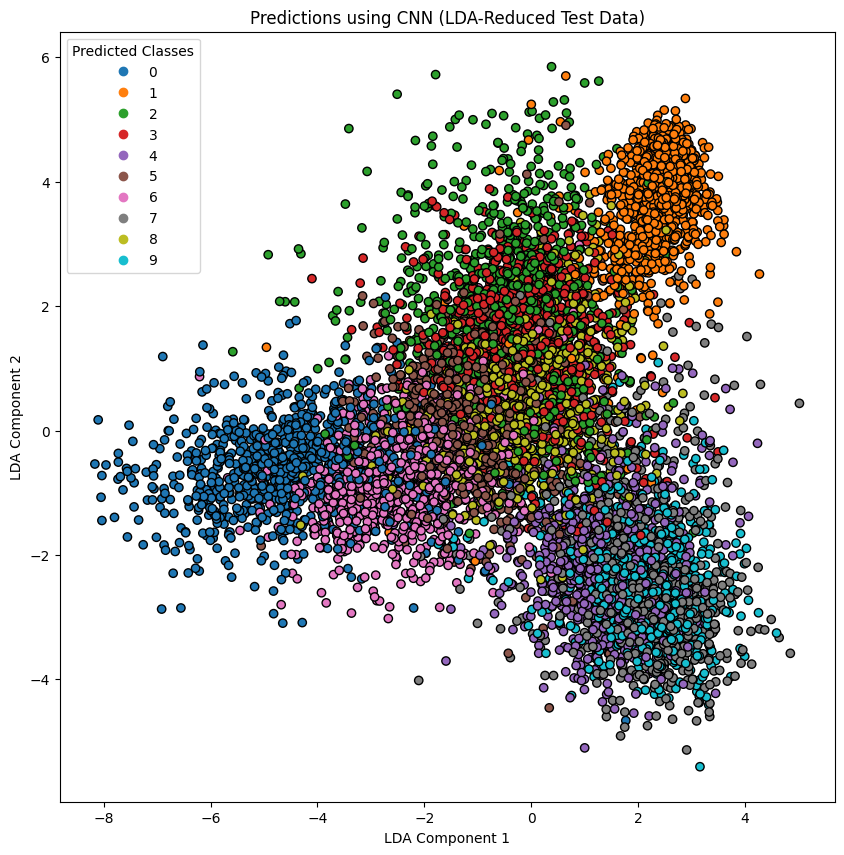

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load the pre-trained model
model_S = load_model(r'F:\AMRITA ALL SEMESTER\SEMESTER-4\ML\project\image_recog_mnist_m\bestmodel.h5')

# Load MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess X_test to match the model's expected input (3 channels)
X_test = X_test.astype('float32') / 255.0
X_test = np.stack([X_test] * 3, axis=-1)  # Convert grayscale to RGB by stacking 3 channels

# Reshape for the model input
X_test = X_test.reshape(-1, 28, 28, 3)

# Flatten the images for LDA
X_test_flat = X_test.reshape(X_test.shape[0], -1)  

# One-hot encode the labels
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Predict using the CNN model
y_pred = model_S.predict(X_test)

# Convert predictions and labels to integer format
y_test_int = np.argmax(y_test_one_hot, axis=1)

# Print shapes for verification
print("X_test_flat shape:", X_test_flat.shape)
print("y_test_int shape:", y_test_int.shape)

# Perform Linear Discriminant Analysis (LDA)
lda = LDA(n_components=2)
X_reduced = lda.fit_transform(X_test_flat, y_test_int)

# Plot the LDA-reduced data with predicted classes
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred.argmax(axis=1), cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted Classes")
plt.title("Predictions using CNN (LDA-Reduced Test Data)")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.show()


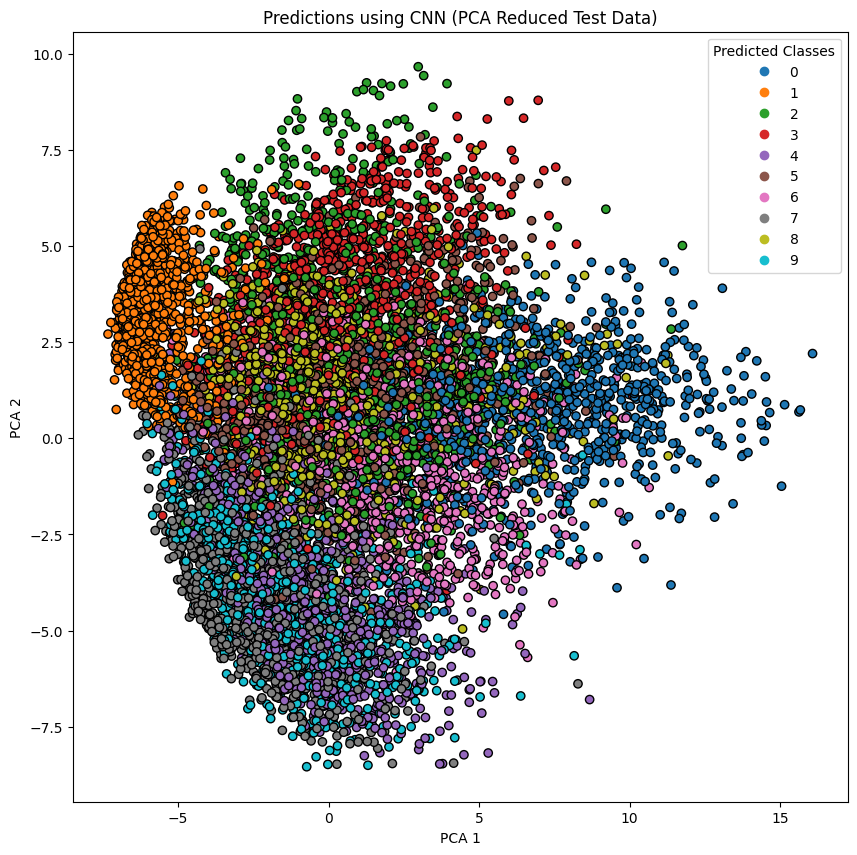

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test_flat, y_test_int)  
X_reduced_subset = X_reduced[:1000]
y_pred_subset = y_pred[:1000]
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred.argmax(axis=1), cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted Classes")
plt.title("Predictions using CNN (PCA Reduced Test Data)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


C:\Users\anshb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


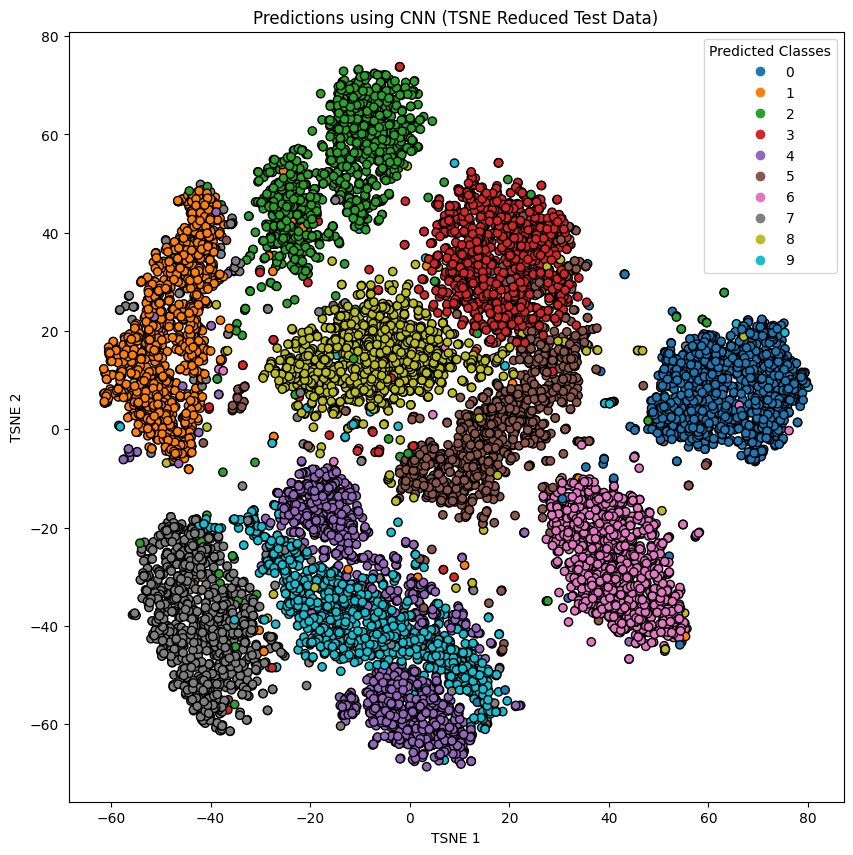

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=50,n_iter=1000)
X_reduced = tsne.fit_transform(X_test_flat, y_test_int)  
X_reduced_subset = X_reduced[:1000]
y_pred_subset = y_pred[:1000]
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred.argmax(axis=1), cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted Classes")
plt.title("Predictions using CNN (TSNE Reduced Test Data)")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()


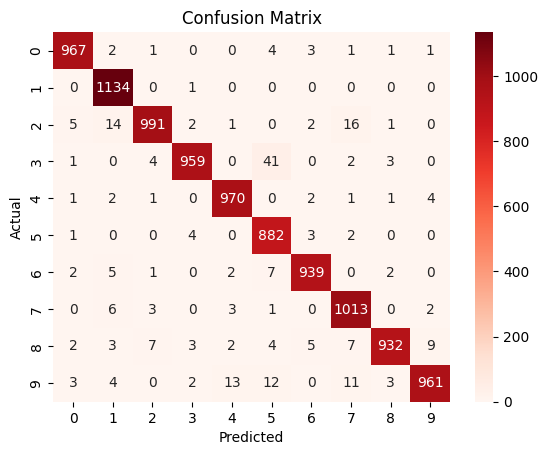

In [ ]:
import numpy as np

if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
    y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

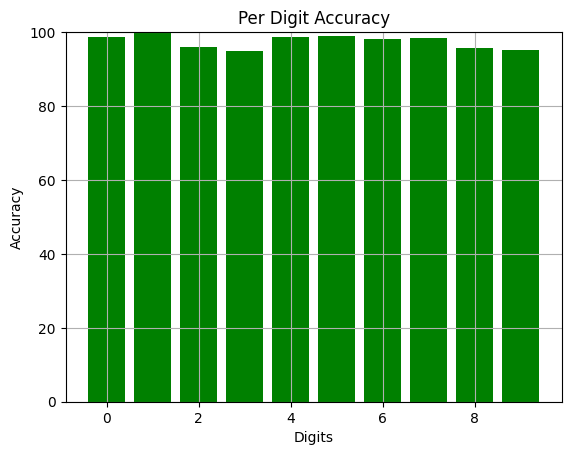

In [16]:
import numpy as np

accuracies = []
for digit in range(10):
    idx = (y_test == digit)
    correct = (y_pred[idx] == digit).sum()
    total = idx.sum()
    accuracies.append(correct / total * 100)

plt.bar(range(10), accuracies, color='green')
plt.xlabel("Digits")
plt.ylabel("Accuracy")
plt.title("Per Digit Accuracy")
plt.ylim(0, 100)
plt.grid(True)
plt.show()

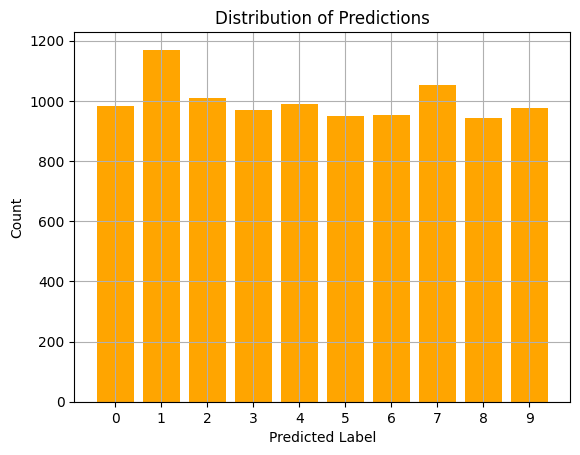

In [17]:
plt.hist(y_pred, bins=np.arange(11)-0.5, rwidth=0.8, color='orange')
plt.xticks(range(10))
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.title("Distribution of Predictions")
plt.grid(True)
plt.show()